# Twitter Automation Scanner - Semantic Content analysis

## Step 1 - Install required dependencies

- [langdetect](https://github.com/Mimino666/langdetect) - langugage detection library
- [matplotlib](https://matplotlib.org) - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- [wordcloud](https://github.com/amueller/word_cloud) - A little word cloud generator in Python
- [spaCy](https://spacy.io) - spaCy is a library for advanced Natural Language Processing. spaCy comes with pretrained pipelines and currently supports tokenization and training for 70+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers.

In [1]:
pip install langdetect matplotlib wordcloud spacy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2 - Load source JSON file

In [2]:
import json
import os

folder_walk = os.walk('sourcedata/user')
first_file_in_folder = next(folder_walk)[2][0]

report_file = open(f'{ os.getcwd() }/sourcedata/user/{first_file_in_folder}')
user_data = json.load(report_file)

## Step 3 - Detect the user language

In [3]:
from langdetect import detect_langs

separator = ' '
tweets = list()

for tweet in user_data['tweets']:
    tweets.append(tweet['text'])

merged_user_posts = separator.join(tweets)
detected_langs_result = detect_langs(merged_user_posts)

print( 'For the provided report used language probabilities are:' )
for result in detected_langs_result:
    probability = round(result.prob * 100, 4)
    print(f'Detected language is { result.lang } with probability { probability }%')



For the provided report used language probabilities are:
Detected language is pl with probability 99.9998%


## Step 4 - Prepare a word cloud

(-0.5, 2999.5, 1999.5, -0.5)

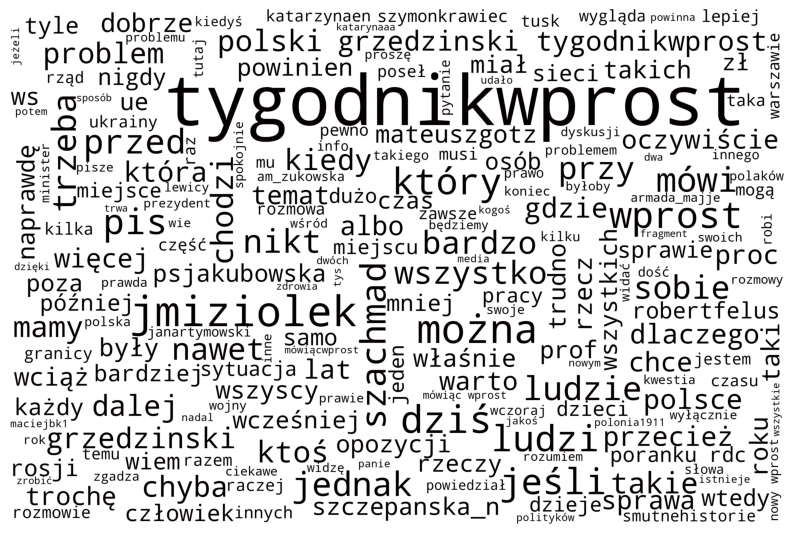

In [4]:
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

skip_words = [
    'nie', 't', 'się', 'co', 'że', 'na', 'z', 'jest', 'w', 'po', 'o', 'rt', 'dla', 'za', 'tym', 'mają', 'może',
    'jego', 'tak', 'nie', 'ma', 'czy', 'jak', 'już', 'kto', 'być', 'są', 'tej', 'jako', 'ale', 'tego', 'od', 'jej',
    'ich', 'go', 'pod', 'nad', 'ten', 'ja', 'nic', 'gdyby', 'bez', 'nich', 'pan', 'pani', 'im', 'tak', 'też', 'że',
    'ci', 'tę' ,'te', 'bo', 'dlatego', 'ponieważ', 'oraz', 'gdyż', 'u', 'coś', 'mnie', 'niż', 'jaka', 'gdy', 'się',
    'aby', 'żeby', 'by', 'oby', 'tych', 'tam', 'tu', 'które', 'której', 'którego', 'którym', 'ile', 'mam', 'ta',
    'jest', 'sam', 'niby', 'którzy', 'których', 'oni', 'jakieś', 'teraz', 'będzie', 'tym', 'było', 'przez', 'tylko',
    'je', 'wiele', 'nas', 'da', 'była', 'będą', 'np', 'nim', 'mi', 'itd', 'nam', 'i', 'ok', 'był', 'to', 'a', 'ty',
    'czym', 'jeszcze', 'ze'
] 

merged_tweets = separator.join(tweets).lower()

merged_tweets = re.sub(r'http\S+', '', merged_tweets)

words = merged_tweets.split()

trimmed_words = list()

for word in words:
    word = re.sub('\W+','', word)
    if word not in skip_words and not word.startswith('@'):
        trimmed_words.append( word )

text = ' '.join(trimmed_words)

wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate(text)

wordcloud.recolor(color_func = black_color_func)

plt.figure(figsize=[10, 15])

plt.imshow(wordcloud)

plt.axis("off")

## Step 5 - Named Entity Recognition

In [5]:
import spacy
from spacy import displacy
from collections import Counter

nlp = spacy.load("pl_core_news_lg")

content = nlp(merged_tweets)

In [6]:
# render text with marked named entities
displacy.render(content, jupyter=True, style='ent')

In [7]:
# render 50 most common named entities
items = [x.text for x in content.ents]

Counter(items).most_common(50)


[('@grzedzinski', 96),
 ('pis', 86),
 ('polski', 57),
 ('polsce', 50),
 ('@tygodnikwprost', 36),
 ('ue', 35),
 ('@katarzynaen', 32),
 ('rosji', 32),
 ('ukrainy', 27),
 ('polska', 27),
 ('polaków', 26),
 ('warszawie', 26),
 ('tusk', 25),
 ('@baleksowska', 24),
 ('@k_stanowski', 24),
 ('warszawy', 20),
 ('polacy', 20),
 ('donald tusk', 19),
 ('@lukasz_rogojsz', 18),
 ('polskiej', 18),
 ('06', 16),
 ('kaczyński', 16),
 ('@gruchalski', 16),
 ('tuska', 15),
 ('ukrainie', 14),
 ('polskich', 14),
 ('🇱', 14),
 ('polak', 13),
 ('@donaldtusk', 13),
 ('tvp', 13),
 ('niemiec', 13),
 ('polskiego', 13),
 ('jarosław kaczyński', 12),
 ('@janartymowski', 12),
 ('putina', 12),
 ('kaczyńskiego', 12),
 ('@psjakubowska', 12),
 ('niemcy', 11),
 ('rt @tygodnikwprost:', 11),
 ('godz.', 11),
 ('00', 10),
 ('francji', 10),
 ('polską', 10),
 ('7.', 10),
 ('@armada_majje', 10),
 ('@giertychroman', 10),
 ('rosjanie', 10),
 ('@dwielowieyska', 10),
 ('@h_orzechowski', 9),
 ('35', 9)]